### Exploratory Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
import shutil

In [2]:
df = pd.read_csv("VideoClassification.csv")
df.head()

,Video No.,Shot No.,Filename,Category,Duration
0,1,1,Video001-Scene-001.mp4,Logo,6.56
1,1,2,Video001-Scene-002.mp4,Animation,1.96
2,1,3,Video001-Scene-003.mp4,IndoorLab,0.96
3,1,4,Video001-Scene-004.mp4,OutdoorGeneric,0.96
4,1,5,Video001-Scene-005.mp4,OutdoorLaunchpad,0.68


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3611 entries, 0 to 3610
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Video No.  3611 non-null   int64  
 1   Shot No.   3611 non-null   int64  
 2   Filename   3611 non-null   object 
 3   Category   3611 non-null   object 
 4   Duration   3611 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 141.2+ KB


In [4]:
df.shape

(3611, 5)

In [5]:
df.describe()

,Video No.,Shot No.,Duration
count,3611.000000,3611.000000,3611.000000
mean,14.430629,105.518693,4.096361
std,6.842659,89.364856,8.030929
min,1.000000,1.000000,0.600000
25%,9.000000,37.000000,1.280000
50%,15.000000,79.000000,2.240000
75%,21.000000,152.000000,4.080000
max,25.000000,431.000000,280.000000


In [6]:
unq_categories = df['Category'].unique()
len(df['Category'].unique())

30

<p>The dataset consists of 3611 videos with the 30 unique categories. It doesnot contain null values. </p>

###### Histogram for Class Labels

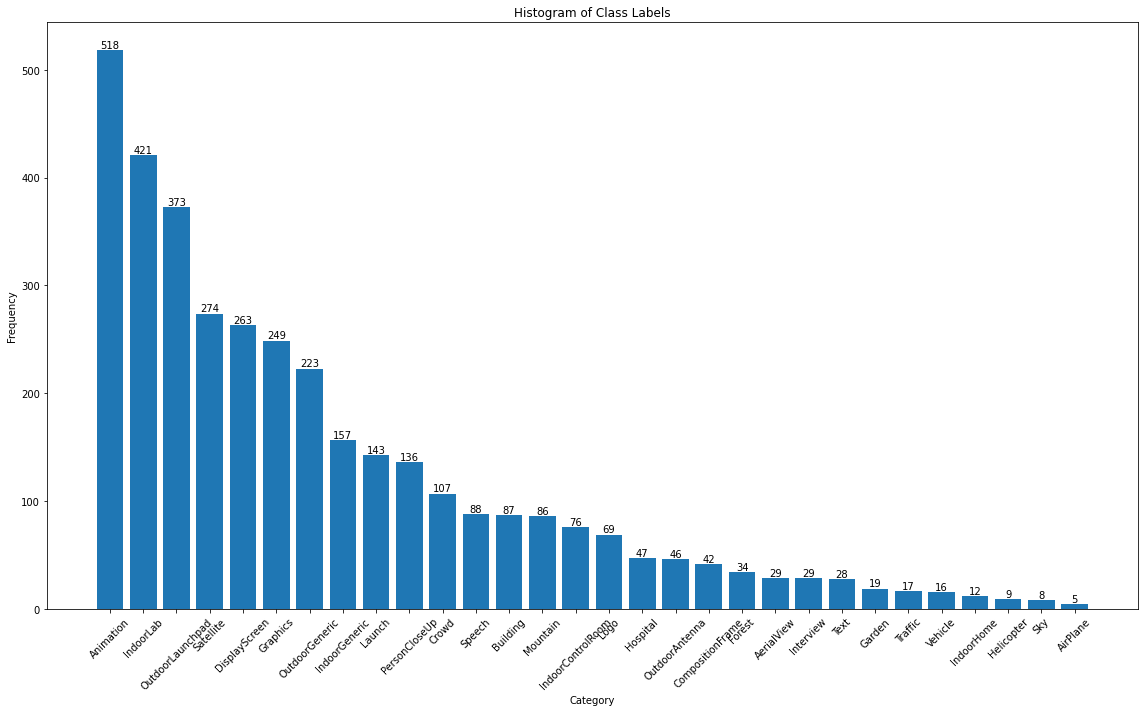

In [7]:
class_labels = df['Category'].value_counts().sort_values(ascending=False).index
class_counts = df['Category'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(16, 10))
plt.bar(range(len(class_labels)), class_counts)
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Histogram of Class Labels')
plt.xticks(range(len(class_labels)), class_labels, rotation=45)  # Rotate x-axis labels by 45 degrees
plt.tight_layout()

# Add count values as annotations
for i, count in enumerate(class_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

<p>Here, we can observe that most of the videos are Animation, Indoorlab, OutdoorLaunchpad and there are very less videos on Airplane, Sky, Helicopter. So, we can remove those categories which have less than 10 videos</p>


In [8]:
# Filter DataFrame for videos with duration greater than 5 seconds
long_durations_df = df[df['Duration'] > 5]

In [9]:
long_durations_df.shape

(719, 5)

In [10]:
long_durations_df.describe()

,Video No.,Shot No.,Duration
count,719.000000,719.000000,719.000000
mean,15.567455,111.506259,12.410125
std,7.350410,104.024355,15.255844
min,1.000000,1.000000,5.040000
25%,10.000000,33.000000,6.200000
50%,18.000000,75.000000,8.400000
75%,23.000000,158.500000,13.060000
max,25.000000,431.000000,280.000000


We can see that there are only 719 videos having greater that 5 seconds duration. With the small duration videos, we can't get the accurate results.It may be possible in the change of the category for every second. So, we should consider the large duration.
Here, the average duration is 12.41 seconds and the maximum duration is 280 seconds( which means 4min 6sec).

In [11]:
len(long_durations_df['Category'].unique())

26

In [12]:
unq_cat_longduration_df = long_durations_df['Category'].unique()

removed_categories = [category for category in unq_categories if category not in unq_cat_longduration_df] 

print(f"The removed categories are: {removed_categories}. These categories contain less than 5 seconds videos")

The removed categories are: ['AerialView', 'Helicopter', 'IndoorHome', 'Vehicle']. These categories contain less than 5 seconds videos


###### Plot the Histogram for long duration videos

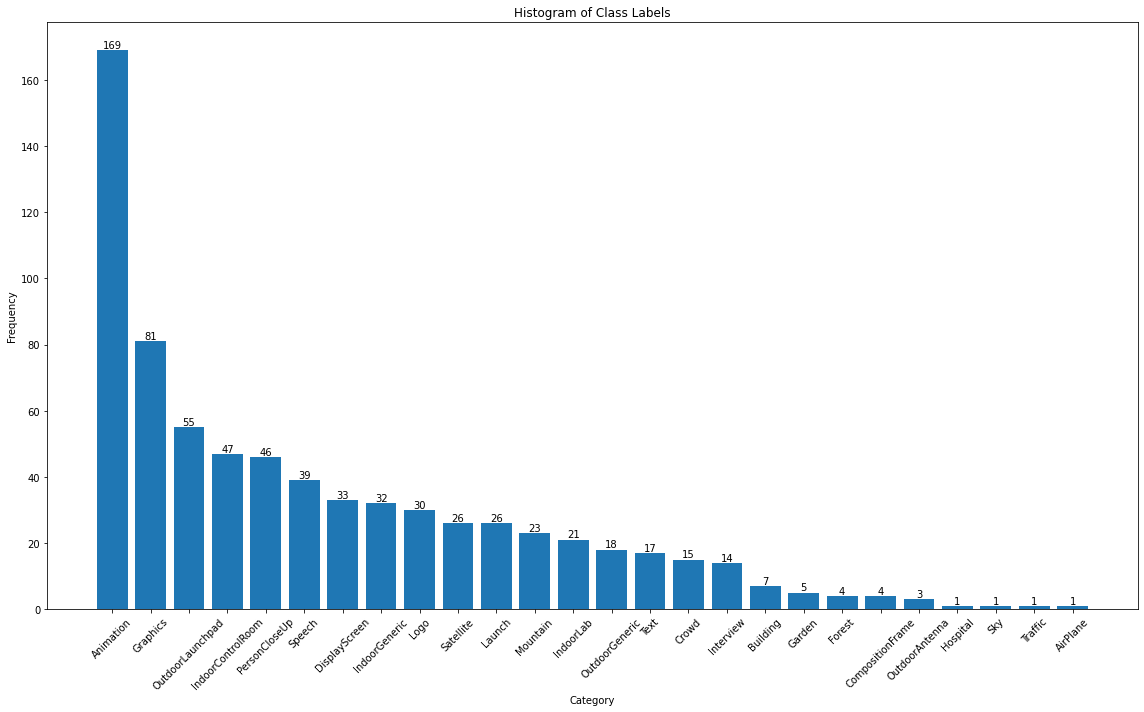

In [13]:
class_labels = long_durations_df['Category'].value_counts().sort_values(ascending=False).index
class_counts = long_durations_df['Category'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(16, 10))
plt.bar(range(len(class_labels)), class_counts)
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Histogram of Class Labels')
plt.xticks(range(len(class_labels)), class_labels, rotation=45)  # Rotate x-axis labels by 45 degrees
plt.tight_layout()

# Add count values as annotations
for i, count in enumerate(class_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

Now, we can observe that the categories such as Airplane, Traffic, Sky,Hospital, OutdoorAntenna,CompositionFrame and Forest are having less than 5 videos.

In [14]:
# Get the classes that have less than 5 videos
classes = long_durations_df['Category'].value_counts()
classes = classes[classes < 5].index.tolist()
classes

['Forest',
 'CompositionFrame',
 'OutdoorAntenna',
 'Hospital',
 'Sky',
 'Traffic',
 'AirPlane']

In [15]:
check_duration_df = long_durations_df[long_durations_df['Category'].isin(classes)]
check_duration_df.head()

,Video No.,Shot No.,Filename,Category,Duration
153,3,14,Video003-Scene-014.mp4,Forest,5.56
166,3,27,Video003-Scene-027.mp4,Forest,6.24
167,3,28,Video003-Scene-028.mp4,Forest,8.64
387,4,9,Video004-Scene-009.mp4,Traffic,9.68
570,6,62,Video006-Scene-062.mp4,OutdoorAntenna,8.68


In [16]:
check_duration_df.describe()

,Video No.,Shot No.,Duration
count,15.000000,15.000000,15.000000
mean,12.400000,87.533333,7.912000
std,8.424454,90.497724,2.917424
min,3.000000,9.000000,5.080000
25%,5.000000,24.000000,6.060000
50%,8.000000,55.000000,6.560000
75%,21.000000,128.000000,8.900000
max,24.000000,273.000000,15.280000


Here, The categories which has less than 5 videos having 7.9 seconds average duration.

## Feature Engineering

Let's consider only set of videos which are having greater than 5 seconds duration and having each category should contain at least 5 videos.

So, we can remove some of the categories that have less than 5 videos 

In [17]:
# Get the classes that have less than 5 videos
classes = long_durations_df['Category'].value_counts()
classes = classes[classes < 5].index.tolist()
print(classes)

['Forest', 'CompositionFrame', 'OutdoorAntenna', 'Hospital', 'Sky', 'Traffic', 'AirPlane']


In [18]:
final_df = long_durations_df[~long_durations_df['Category'].isin(classes)]

In [19]:
final_df.head()

,Video No.,Shot No.,Filename,Category,Duration
0,1,1,Video001-Scene-001.mp4,Logo,6.56
15,1,16,Video001-Scene-016.mp4,OutdoorLaunchpad,6.44
16,1,17,Video001-Scene-017.mp4,OutdoorLaunchpad,5.40
18,1,19,Video001-Scene-019.mp4,Animation,14.16
24,1,25,Video001-Scene-025.mp4,Graphics,10.00


In [20]:
final_df.shape

(704, 5)

In [21]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 704 entries, 0 to 3609
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Video No.  704 non-null    int64  
 1   Shot No.   704 non-null    int64  
 2   Filename   704 non-null    object 
 3   Category   704 non-null    object 
 4   Duration   704 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 33.0+ KB


In [22]:
final_df.describe()

,Video No.,Shot No.,Duration
count,704.000000,704.000000,704.000000
mean,15.634943,112.017045,12.505966
std,7.317741,104.289671,15.397934
min,1.000000,1.000000,5.040000
25%,10.000000,34.000000,6.200000
50%,18.000000,75.000000,8.440000
75%,23.000000,159.000000,13.140000
max,25.000000,431.000000,280.000000


In [23]:
print(f"Final Categories are: {final_df['Category'].unique()}\n")
print(f"No.of Categories are : {len(final_df['Category'].unique())}")

Final Categories are: ['Logo' 'OutdoorLaunchpad' 'Animation' 'Graphics' 'Text' 'Interview'
 'Launch' 'IndoorLab' 'OutdoorGeneric' 'Satellite' 'Mountain' 'Speech'
 'PersonCloseUp' 'DisplayScreen' 'Building' 'Crowd' 'IndoorGeneric'
 'Garden' 'IndoorControlRoom']

No.of Categories are : 19


In [76]:
final_df.to_csv("VideoClassificationFinal.csv", index = False)

In [24]:
# Get the FPS rate of the video
def get_fps_rate(video_file_path):
    video_path = video_file_path
    video = cv2.VideoCapture(video_path)
    # Check if the video file was successfully opened
    if not video.isOpened():
        print("Error opening video file")

    # Get the frames per second (FPS) rate of the video
    fps = video.get(cv2.CAP_PROP_FPS)
    # Release the video file
    video.release()
    return fps

In [25]:
sample_df = final_df.head()
sample_df

,Video No.,Shot No.,Filename,Category,Duration
0,1,1,Video001-Scene-001.mp4,Logo,6.56
15,1,16,Video001-Scene-016.mp4,OutdoorLaunchpad,6.44
16,1,17,Video001-Scene-017.mp4,OutdoorLaunchpad,5.40
18,1,19,Video001-Scene-019.mp4,Animation,14.16
24,1,25,Video001-Scene-025.mp4,Graphics,10.00


##### Store these files in a seperate folder for each category

In [101]:
base_dir = os.getcwd()
video_dir = os.path.join(base_dir, "Videos\\Videos")

output_dir = os.path.join(base_dir, "FinalVideos")
for index,row in final_df.iterrows():
    filename = row['Filename']
    category = row['Category']
    
    # Create  a directory for the each category
    category_dir = os.path.join(output_dir, category)
    if not os.path.exists(category_dir):
        os.makedirs(category_dir)
    
    source_path = os.path.join(video_dir, filename)
    destination_path = os.path.join(category_dir, os.path.basename(filename))
    
    shutil.copy(source_path, destination_path)

In [26]:
import os
import shutil
import pandas as pd

base_dir = os.getcwd()
video_dir = os.path.join(base_dir, "Videos\\Videos")
output_dir = os.path.join(base_dir, "SelectedVideos")

# Define the maximum number of videos to store per category
max_videos_per_category = 15

# Create a dictionary to store the count of videos per category
video_count = {}

# Create a dataframe to store the information of stored files
stored_files_df = pd.DataFrame(columns=['Filename', 'Category', 'Destination'])

for index, row in final_df.iterrows():
    filename = row['Filename']
    category = row['Category']

    # Create a directory for each category
    category_dir = os.path.join(output_dir, category)
    if not os.path.exists(category_dir):
        os.makedirs(category_dir)

    # Check if the maximum number of videos has been reached for the current category
    if category in video_count and video_count[category] >= max_videos_per_category:
        continue

    source_path = os.path.join(video_dir, filename)
    destination_path = os.path.join(category_dir, os.path.basename(filename))

    shutil.copy(source_path, destination_path)

    # Update the video count for the current category
    if category in video_count:
        video_count[category] += 1
    else:
        video_count[category] = 1

    # Add the stored file information to the dataframe
    stored_files_df = stored_files_df.append({'Filename': filename, 'Category': category, 'Destination': destination_path},
                                             ignore_index=True)

# Print the dataframe with stored files information
print(stored_files_df)


C:\Users\Sheela Sai kumar\AppData\Local\Temp\ipykernel_18992\657163122.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stored_files_df = stored_files_df.append({'Filename': filename, 'Category': category, 'Destination': destination_path},
C:\Users\Sheela Sai kumar\AppData\Local\Temp\ipykernel_18992\657163122.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stored_files_df = stored_files_df.append({'Filename': filename, 'Category': category, 'Destination': destination_path},
C:\Users\Sheela Sai kumar\AppData\Local\Temp\ipykernel_18992\657163122.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stored_files_df = stored_files_df.append({'Filename': filename, 'Category': category, 'Destination': destination_path},
C

C:\Users\Sheela Sai kumar\AppData\Local\Temp\ipykernel_18992\657163122.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stored_files_df = stored_files_df.append({'Filename': filename, 'Category': category, 'Destination': destination_path},
C:\Users\Sheela Sai kumar\AppData\Local\Temp\ipykernel_18992\657163122.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stored_files_df = stored_files_df.append({'Filename': filename, 'Category': category, 'Destination': destination_path},
C:\Users\Sheela Sai kumar\AppData\Local\Temp\ipykernel_18992\657163122.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stored_files_df = stored_files_df.append({'Filename': filename, 'Category': category, 'Destination': destination_path},
C

C:\Users\Sheela Sai kumar\AppData\Local\Temp\ipykernel_18992\657163122.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stored_files_df = stored_files_df.append({'Filename': filename, 'Category': category, 'Destination': destination_path},
C:\Users\Sheela Sai kumar\AppData\Local\Temp\ipykernel_18992\657163122.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stored_files_df = stored_files_df.append({'Filename': filename, 'Category': category, 'Destination': destination_path},
C:\Users\Sheela Sai kumar\AppData\Local\Temp\ipykernel_18992\657163122.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stored_files_df = stored_files_df.append({'Filename': filename, 'Category': category, 'Destination': destination_path},
C

C:\Users\Sheela Sai kumar\AppData\Local\Temp\ipykernel_18992\657163122.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stored_files_df = stored_files_df.append({'Filename': filename, 'Category': category, 'Destination': destination_path},
C:\Users\Sheela Sai kumar\AppData\Local\Temp\ipykernel_18992\657163122.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stored_files_df = stored_files_df.append({'Filename': filename, 'Category': category, 'Destination': destination_path},
C:\Users\Sheela Sai kumar\AppData\Local\Temp\ipykernel_18992\657163122.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stored_files_df = stored_files_df.append({'Filename': filename, 'Category': category, 'Destination': destination_path},
C

C:\Users\Sheela Sai kumar\AppData\Local\Temp\ipykernel_18992\657163122.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stored_files_df = stored_files_df.append({'Filename': filename, 'Category': category, 'Destination': destination_path},
C:\Users\Sheela Sai kumar\AppData\Local\Temp\ipykernel_18992\657163122.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stored_files_df = stored_files_df.append({'Filename': filename, 'Category': category, 'Destination': destination_path},
C:\Users\Sheela Sai kumar\AppData\Local\Temp\ipykernel_18992\657163122.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stored_files_df = stored_files_df.append({'Filename': filename, 'Category': category, 'Destination': destination_path},
C

C:\Users\Sheela Sai kumar\AppData\Local\Temp\ipykernel_18992\657163122.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stored_files_df = stored_files_df.append({'Filename': filename, 'Category': category, 'Destination': destination_path},
C:\Users\Sheela Sai kumar\AppData\Local\Temp\ipykernel_18992\657163122.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stored_files_df = stored_files_df.append({'Filename': filename, 'Category': category, 'Destination': destination_path},
C:\Users\Sheela Sai kumar\AppData\Local\Temp\ipykernel_18992\657163122.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stored_files_df = stored_files_df.append({'Filename': filename, 'Category': category, 'Destination': destination_path},
C

C:\Users\Sheela Sai kumar\AppData\Local\Temp\ipykernel_18992\657163122.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stored_files_df = stored_files_df.append({'Filename': filename, 'Category': category, 'Destination': destination_path},
C:\Users\Sheela Sai kumar\AppData\Local\Temp\ipykernel_18992\657163122.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stored_files_df = stored_files_df.append({'Filename': filename, 'Category': category, 'Destination': destination_path},
C:\Users\Sheela Sai kumar\AppData\Local\Temp\ipykernel_18992\657163122.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stored_files_df = stored_files_df.append({'Filename': filename, 'Category': category, 'Destination': destination_path},
C

C:\Users\Sheela Sai kumar\AppData\Local\Temp\ipykernel_18992\657163122.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stored_files_df = stored_files_df.append({'Filename': filename, 'Category': category, 'Destination': destination_path},
C:\Users\Sheela Sai kumar\AppData\Local\Temp\ipykernel_18992\657163122.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stored_files_df = stored_files_df.append({'Filename': filename, 'Category': category, 'Destination': destination_path},
C:\Users\Sheela Sai kumar\AppData\Local\Temp\ipykernel_18992\657163122.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stored_files_df = stored_files_df.append({'Filename': filename, 'Category': category, 'Destination': destination_path},
C

C:\Users\Sheela Sai kumar\AppData\Local\Temp\ipykernel_18992\657163122.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stored_files_df = stored_files_df.append({'Filename': filename, 'Category': category, 'Destination': destination_path},
C:\Users\Sheela Sai kumar\AppData\Local\Temp\ipykernel_18992\657163122.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stored_files_df = stored_files_df.append({'Filename': filename, 'Category': category, 'Destination': destination_path},
C:\Users\Sheela Sai kumar\AppData\Local\Temp\ipykernel_18992\657163122.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stored_files_df = stored_files_df.append({'Filename': filename, 'Category': category, 'Destination': destination_path},
C

                   Filename          Category  \
0    Video001-Scene-001.mp4              Logo   
1    Video001-Scene-016.mp4  OutdoorLaunchpad   
2    Video001-Scene-017.mp4  OutdoorLaunchpad   
3    Video001-Scene-019.mp4         Animation   
4    Video001-Scene-025.mp4          Graphics   
..                      ...               ...   
261  Video023-Scene-426.mp4             Crowd   
262  Video023-Scene-428.mp4             Crowd   
263  Video023-Scene-430.mp4             Crowd   
264  Video024-Scene-008.mp4          Building   
265  Video025-Scene-033.mp4            Garden   

                                           Destination  
0    C:\Users\Sheela Sai kumar\Documents\CNN\SS585-...  
1    C:\Users\Sheela Sai kumar\Documents\CNN\SS585-...  
2    C:\Users\Sheela Sai kumar\Documents\CNN\SS585-...  
3    C:\Users\Sheela Sai kumar\Documents\CNN\SS585-...  
4    C:\Users\Sheela Sai kumar\Documents\CNN\SS585-...  
..                                                 ...  
261  C:\User

C:\Users\Sheela Sai kumar\AppData\Local\Temp\ipykernel_18992\657163122.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stored_files_df = stored_files_df.append({'Filename': filename, 'Category': category, 'Destination': destination_path},
C:\Users\Sheela Sai kumar\AppData\Local\Temp\ipykernel_18992\657163122.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stored_files_df = stored_files_df.append({'Filename': filename, 'Category': category, 'Destination': destination_path},
C:\Users\Sheela Sai kumar\AppData\Local\Temp\ipykernel_18992\657163122.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stored_files_df = stored_files_df.append({'Filename': filename, 'Category': category, 'Destination': destination_path},
C

In [30]:
stored_files_df.to_csv("selected_videos.csv", index = False)

In [32]:
stored_files_df.shape

(266, 3)

In [35]:
len(stored_files_df['Category'].unique())

19

In [36]:
stored_files_df['Category'].value_counts()

Logo                 15
OutdoorLaunchpad     15
IndoorGeneric        15
Crowd                15
DisplayScreen        15
PersonCloseUp        15
Speech               15
Mountain             15
Satellite            15
OutdoorGeneric       15
IndoorLab            15
Launch               15
Text                 15
Graphics             15
Animation            15
IndoorControlRoom    15
Interview            14
Building              7
Garden                5
Name: Category, dtype: int64